# Machine Learning Pipeline for Mortgage Backed Securities Prepayment Risk

## The LoanExport data consists of 291451 rows and 28 columns. The columns of the dataset are explained below:

### 0   CreditScore :                     Credit score of the client 
###  1   FirstPaymentDate  :         First payment date of the customer
###  2   FirstTimeHomebuyer :     If the customer is first time home buyer 
###  3   MaturityDate   :                 Maturity date of the customer 
###  4   MSA  :                                Mortgage security amount
###  5   MIP   :                                Mortgage insurance percentage  
###  6   Units  :            Number of units  
###  7   Occupancy  :        Occupancy status at the time the loan
###  8   OCLTV  :            Original Combined Loan-to-Value 
###  9   DTI  :              Debt to income ratio 
###  10  OrigUPB  :          Original unpaid principal balance
###  11  LTV   :          Loan-to-Value 
###  12  OrigInterestRate :   Original interest rate
###  13  Channel  :           The origination channel used by the party
###  14  PPM  :               Prepayment penalty mortgage
###  15  ProductType  :       Type of product 
###  16  PropertyState  :     State in which the property is located 
###  17  PropertyType :       Property type 
###  18  PostalCode  :        Postal code of the property
###  19  LoanSeqNum  :        Loan number
###  20  LoanPurpose   :      Purpose of the loan
###  21  OrigLoanTerm  :      Original term of the loan 
###  22  NumBorrowers :       Number of borrowers 
###  23  SellerName  :        Name of seller
###  24  ServicerName  :      Name of the service used
###  25  EverDelinquent  :    If the loan was ever delinquent  
###  26  MonthsDelinquent  :  Months of delinquent  
###  27  MonthsInRepayment :  Months in repayment

## Importing libraries and data. We will do basic analysis of data.

In [1]:
#Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import xlrd
#warning hadle
import warnings# warning filter
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
#Read files:
data = pd.read_csv("LoanExport.csv", header= 0)
pd.set_option('display.max_columns', None)

In [3]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [4]:
data.shape

(291451, 28)

In [5]:
data.describe(include= "all")

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451,291451.000000,291451,291451.000000,291451.000000,291451,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451,291451,291451,291451,291451,291451,291451,291451,291451.000000,291451,266457,291451,291451.000000,291451.000000,291451.000000
unique,NaN,NaN,3,NaN,392,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,4,3,1,53,7,1767,291451,3,NaN,3,20,20,NaN,NaN,NaN
top,NaN,NaN,N,NaN,X,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,T,N,FRM,CA,SF,94500,F199Q1268030,P,NaN,2,Ot,Other servicers,NaN,NaN,NaN
freq,NaN,NaN,184154,NaN,39100,NaN,NaN,276131,NaN,NaN,NaN,NaN,NaN,167670,282125,291451,43327,244923,2582,1,123404,NaN,187335,76943,64043,NaN,NaN,NaN
mean,708.936991,199904.760553,NaN,202902.367043,NaN,9.216685,1.026022,NaN,76.960529,30.033453,124940.387921,76.937986,6.926547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359.835375,NaN,NaN,NaN,0.197848,1.837729,60.805291
std,68.408791,13.821228,NaN,16.090508,NaN,12.648273,0.202986,NaN,15.236154,13.203974,53657.440624,15.225298,0.343541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.286939,NaN,NaN,NaN,0.398378,8.809392,46.142599
min,0.000000,199901.000000,NaN,202402.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,8000.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,NaN,202902.000000,NaN,0.000000,1.000000,NaN,70.000000,22.000000,83000.000000,70.000000,6.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,NaN,202903.000000,NaN,0.000000,1.000000,NaN,80.000000,31.000000,117000.000000,80.000000,6.875000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,NaN,202904.000000,NaN,25.000000,1.000000,NaN,90.000000,39.000000,160000.000000,90.000000,7.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,63.000000


## There are no duplicates in data, but there are some null values.

In [6]:
# Checking duplicate rows
len(data[data.duplicated()])

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [8]:
data.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

## we know that seller type is not an important column for further analysis, so for the time being we can replace missing values as others (O) as we will drop the column later.

In [9]:
data['SellerName']=data['SellerName'].replace(np.nan,'O')

## We will convert the dates in  data into date types

In [10]:
# Convert FirstPaymentDate ' and 'MaturityDate' columns to datetime format
data['Year']=pd.to_datetime(data['FirstPaymentDate'], format='%Y%M').dt.strftime('%Y')
data['FirstPaymentDate'] = pd.to_datetime(data['FirstPaymentDate'], format='%Y%M').dt.strftime('%m/%Y')
data['MaturityDate'] = pd.to_datetime(data['MaturityDate'], format='%Y%M').dt.strftime('%m/%Y')

# Verify the changes
print(data[['FirstPaymentDate', 'MaturityDate']])

       FirstPaymentDate MaturityDate
0               01/1999      01/2029
1               01/1999      01/2029
2               01/1999      01/2029
3               01/1999      01/2029
4               01/1999      01/2029
...                 ...          ...
291446          01/1999      01/2029
291447          01/2002      01/2029
291448          01/2003      01/2029
291449          01/1999      01/2029
291450          01/1999      01/2029

[291451 rows x 2 columns]


## We check for unique values in each column

In [11]:
# check unique values in dataset
data.apply(lambda x: (x.unique()))

CreditScore           [0, 335, 342, 363, 366, 370, 375, 391, 396, 44...
FirstPaymentDate      [01/1999, 01/2000, 01/2001, 01/2002, 01/2003, ...
FirstTimeHomebuyer                                            [N, X, Y]
MaturityDate          [01/2029, 01/2027, 01/2024, 01/2026, 01/2030, ...
MSA                   [16974, 19740, 29940, 31084, 35644, X    , 367...
MIP                   [25, 0, 30, 12, 35, 29, 17, 18, 20, 22, 6, 14,...
Units                                                   [1, 2, 4, 3, 0]
Occupancy                                                     [O, I, S]
OCLTV                 [89, 73, 75, 76, 78, 90, 72, 95, 80, 77, 85, 9...
DTI                   [27, 17, 16, 14, 18, 40, 21, 20, 38, 19, 23, 4...
OrigUPB               [117000, 109000, 88000, 160000, 207000, 111000...
LTV                   [89, 73, 75, 76, 78, 90, 72, 95, 80, 77, 85, 9...
OrigInterestRate      [6.75, 6.5, 6.875, 7.125, 7.0, 7.25, 6.625, 7....
Channel                                                    [T, R

## We can observe that some data are not provided and is marked as X

In [12]:
count = (data.astype(str).applymap(str.strip) == "X").sum()

print(count)


CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer    78015
MaturityDate              0
MSA                   39100
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                    5405
ProductType               0
PropertyState             0
PropertyType             22
PostalCode                6
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers            339
SellerName                0
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
Year                      0
dtype: int64


## We will change X values of NumBorrowers by its mode "2" and PropertyType by SF

In [13]:
data.drop(data[data['NumBorrowers'] == 'X '].index, inplace=True)


In [14]:
data['PropertyType'].replace('X ', 'SF', inplace=True)

## First we will remove X in the FirstTimeHomebuyer column as it is irrelevant.

In [15]:
c= ((data['FirstTimeHomebuyer'].value_counts()))
print(c)

N    183988
X     77850
Y     29274
Name: FirstTimeHomebuyer, dtype: int64


In [16]:
data.drop(data[data['FirstTimeHomebuyer'] == 'X'].index, inplace=True)
data['FirstTimeHomebuyer'].unique()

array(['N', 'Y'], dtype=object)

## We do not need column  PostalCode  for further analysis as we can use propertystate instead

In [17]:
data.drop(['PostalCode','ProductType','LoanSeqNum'], axis=1, inplace=True)


## We will delete the rows with X in the columns 'MSA' and 'PPM' to clean data. We cannot use imputation method here as it will affect the integrity of the data.

In [18]:
data = data[(data[['MSA','PPM']].apply(lambda x: x.str.strip()) != 'X').all(axis=1)]
count = (data.astype(str).applymap(str.strip) == "X").sum()
print(count)


CreditScore           0
FirstPaymentDate      0
FirstTimeHomebuyer    0
MaturityDate          0
MSA                   0
MIP                   0
Units                 0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
PropertyState         0
PropertyType          0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
SellerName            0
ServicerName          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
Year                  0
dtype: int64


## There are only two rows with date 2011 and 2013. We can remove this as it affects our analysis.

In [19]:
data=data[data['FirstPaymentDate'] < '01/2011']

In [20]:
data.shape

(181684, 26)

## We will also remove null values

In [21]:
data.isnull().sum()

CreditScore           0
FirstPaymentDate      0
FirstTimeHomebuyer    0
MaturityDate          0
MSA                   0
MIP                   0
Units                 0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
PropertyState         0
PropertyType          0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
SellerName            0
ServicerName          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
Year                  0
dtype: int64

In [22]:
data.dropna(inplace=True)

data.shape


(181684, 26)

# Exploratory Data Analysis

## We set our target variable as EverDelinquent and do our analysis based on that. Before that we will be creating some new columns that will help in our analysis. 

## We will create a band for CreditScores. The more the credit scores are the better for the bank.CreditScore contains a 0 which the data definition states is actually 850. Let's convert all 0's to 850

In [23]:

data['CreditScore'] = np.where(data['CreditScore'] == 0,850 , data['CreditScore'])
data.CreditScore.unique()

array([850, 335, 342, 366, 375, 396, 466, 471, 477, 479, 482, 483, 486,
       487, 489, 490, 491, 492, 494, 495, 496, 498, 499, 500, 502, 503,
       504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516,
       517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529,
       530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542,
       543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555,
       556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568,
       569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581,
       582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594,
       595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607,
       608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620,
       621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633,
       634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646,
       647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 65

In [24]:
print('min',data['CreditScore'].min())
print('max',data['CreditScore'].max())
print('mean',data['CreditScore'].mean())

min 335
max 850
mean 712.762263050131


### We made a CreditScoreRange column and found that there is nan value which we removed.

In [25]:

# Create a new column 'CreditScoreRange' by cutting the CreditScore column into bands
data['CreditScoreRange'] =  pd.cut(data.CreditScore,[550,650,700,750,1e6],4,labels=[1,2,3,4])

In [26]:
print('Is there a Null value in CreditScoreRange?', data['CreditScoreRange'].isnull().values.any())
print('Dataframe shape:',data.shape)
data['CreditScoreRange'].value_counts()

Is there a Null value in CreditScoreRange? True
Dataframe shape: (181684, 27)


3    62051
4    49056
2    46297
1    23846
Name: CreditScoreRange, dtype: int64

In [27]:
data = data[data['CreditScoreRange'].notna()]
print('Is there a Null value in CreditScoreRange?', data['CreditScoreRange'].isnull().values.any())
print('Dataframe shape:',data.shape)
data['CreditScoreRange'].value_counts()

Is there a Null value in CreditScoreRange? False
Dataframe shape: (181250, 27)


3    62051
4    49056
2    46297
1    23846
Name: CreditScoreRange, dtype: int64

## We will first convert FirstPaymentMonth and MaturityMonth columns and also create a Loan Duration column .

In [28]:
data['FirstPaymentMonth'] = pd.to_datetime(data['FirstPaymentDate'], format='%m/%Y').dt.strftime('%m')
data['MaturityMonth'] = pd.to_datetime(data['MaturityDate'], format='%m/%Y').dt.strftime('%m')

In [29]:
data['LoanDuration'] = pd.to_datetime(data['MaturityDate'], format='%m/%Y') - pd.to_datetime(data['FirstPaymentDate'], format='%m/%Y')
data['LoanDurationYear'] = (data['LoanDuration'].dt.days // 365 ) 



## We will create a band for OrigInterestRate. The ranges  are 'below_6', '6_and_below_8', '8_and_below_10', '10_and_below_12' and '12_and_below_14'.

In [30]:
print('min',data['OrigInterestRate'].min())
print('max',data['OrigInterestRate'].max())
print('mean',data['OrigInterestRate'].mean())

min 4.0
max 11.5
mean 6.926614311724137


In [31]:
# Define the bins and labels for interest bands
bins = [4,  5,  6,  7, 8 , 9, 10, 11, 12, 13]
labels = ['below_5', '5_and_below_6', '6_and_below_7', '7_and_below_8','8_and_below_9','9_and_below_10','10_and_below_11','11_and_below_12','above_12']

data['OrigInterestRateRange'] = pd.cut(data['OrigInterestRate'], bins=bins, labels=labels, right=False)

## We found that loan to value ratio OCLTV and LTV have 2 values which is equal to zero, which is mostly likely due to missing value as it cannot be zero, so wqe delete it as there is only 2 rows involved.

In [32]:
(data['OCLTV']==0).sum()

2

In [33]:
(data['LTV']==0).sum()

2

In [34]:
data = data[(data['LTV'] != 0) & (data['OCLTV'] != 0)]


## We will create a band for LTV. Original calculated loan to value ratio is better to be lesser for the bank, this means that the value of property is more, and if there is delinquency the acquired value of property will be more than mortgage value, which is good for bank

In [35]:
print('min',data['LTV'].min())
print('max',data['LTV'].max())
print('mean',data['LTV'].mean())

min 6
max 100
mean 78.19311661370057


In [36]:
# Define the bins and labels for LTV bands
bins = [0, 25, 50, 1000]
labels = [1, 2, 3]
data['LTVRange'] = pd.cut(data['LTV'], bins=bins, labels=labels)

In [37]:
print('Is there a Null value in LTV?', data['LTVRange'].isnull().values.any())
print('Dataframe shape:',data.shape)
data['LTVRange'].value_counts()

Is there a Null value in LTV? False
Dataframe shape: (181248, 33)


3    168889
2     11202
1      1157
Name: LTVRange, dtype: int64

In [38]:
#Convert category data into integer
data["CreditScoreRange"] = data["CreditScoreRange"].astype(int)
data["LTVRange"] = data["LTVRange"].astype(int)

## We create a band for MonthsINRepayment

In [39]:
print('min',data['MonthsInRepayment'].min())
print('max',data['MonthsInRepayment'].max())
print('mean',data['MonthsInRepayment'].mean())

min 1
max 212
mean 59.26280014124294


In [40]:
bins = [0, 48, 96, 144,192,240]
labels = ['0-48', '48-96', '96-144','144-192','192-240']
data['RepaymentRange'] = pd.cut(data['MonthsInRepayment'], bins=bins, labels=labels)

##  We can plot some univariate plots to further understand our data.

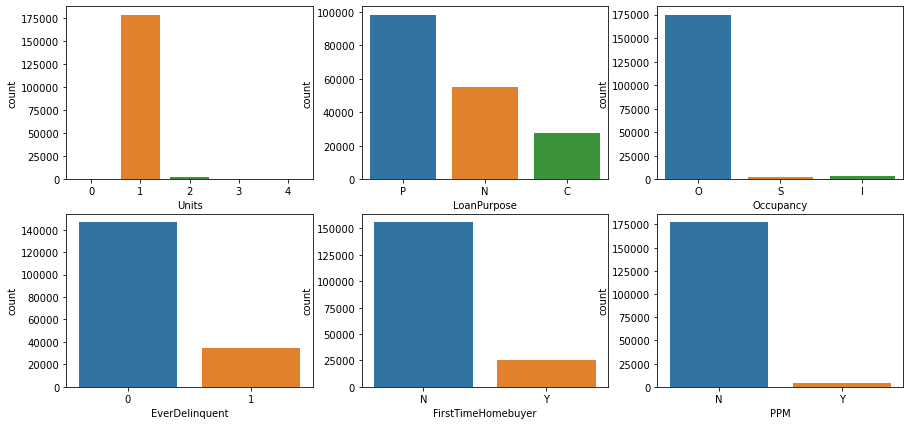

In [41]:
fig, ax =plt.subplots(2,3,figsize=(15,7))
sns.countplot(x=data['Units'], ax=ax[0,0],)
sns.countplot(x=data['LoanPurpose'], ax=ax[0,1])
sns.countplot(x=data['Occupancy'],ax=ax[0,2])
sns.countplot(x=data['EverDelinquent'],ax=ax[1,0])
sns.countplot(x=data['FirstTimeHomebuyer'],ax=ax[1,1])
sns.countplot(x=data['PPM'],ax=ax[1,2])

plt.show()



## We will plot the boxplot and histogram for all numerical variables.

In [42]:
df_num = data.select_dtypes(include = 'number')

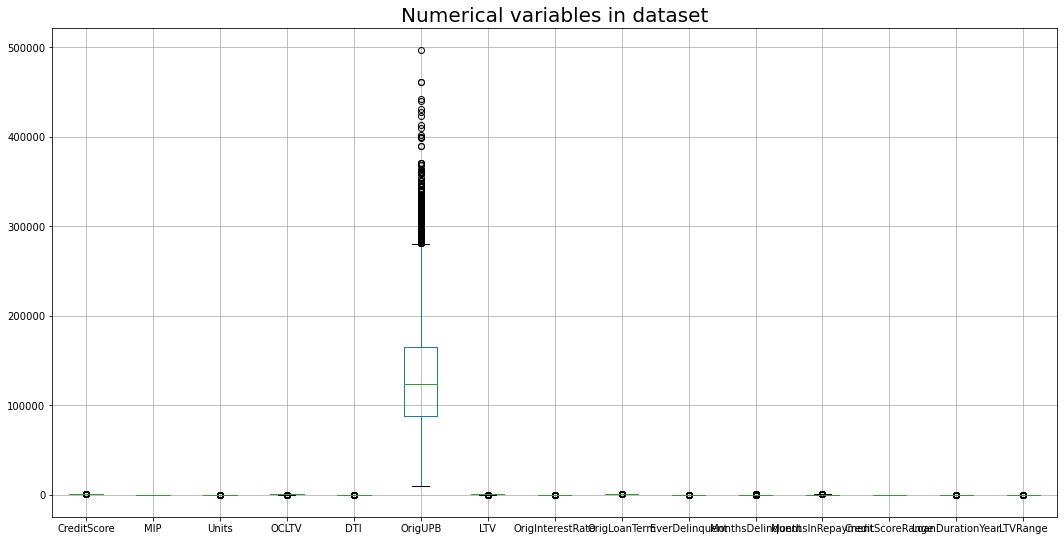

In [43]:
#Boxplot of numerical variables
plt.figure(figsize=(18,9))
df_num.boxplot()
plt.title("Numerical variables in dataset", fontsize=20)
plt.show()

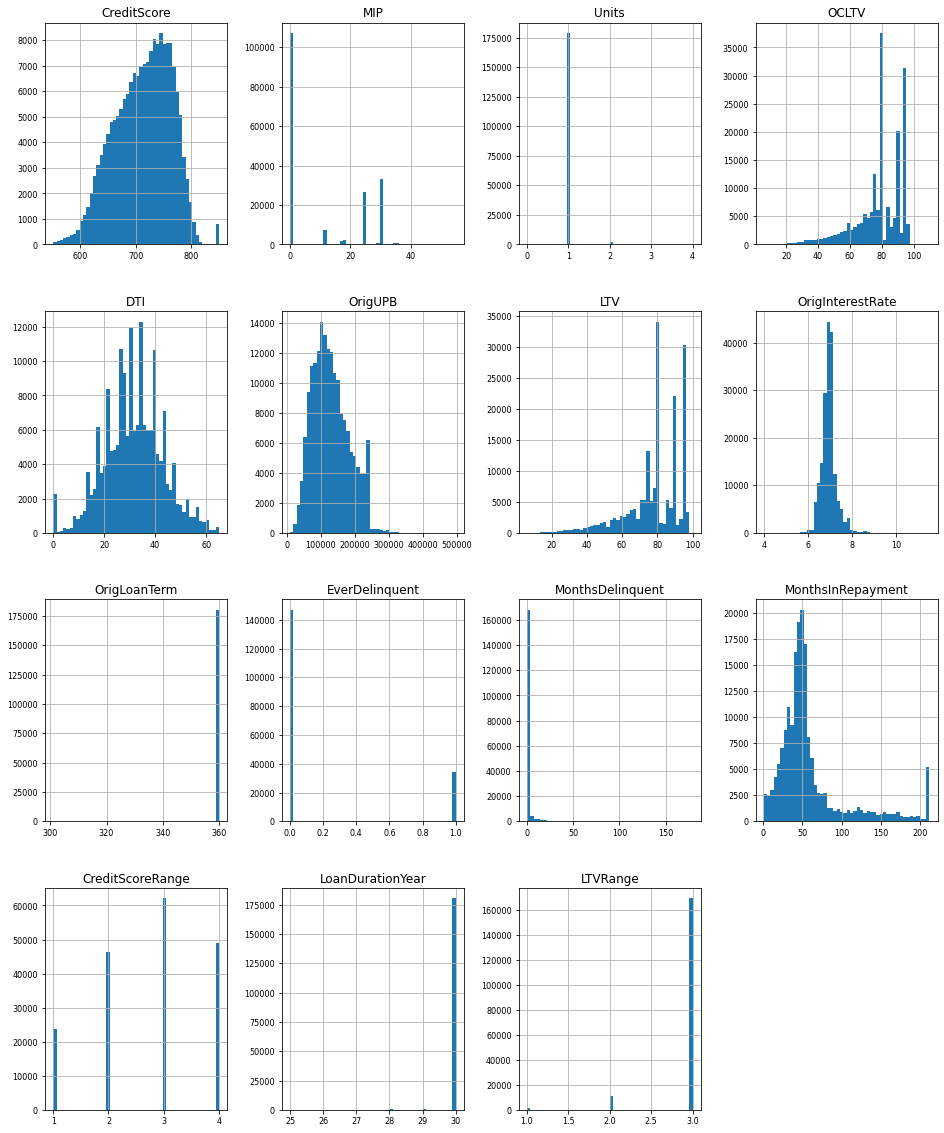

In [44]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## The mean of OrigInerestRate is maximum in the year 2000 followed by 2001 and lowest in 2004. There are a lot of outliers in the year 1999

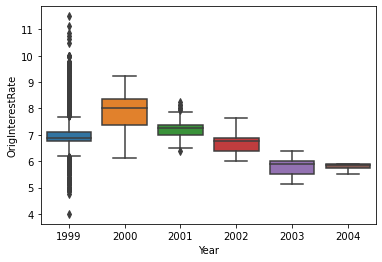

In [45]:
data['Year']= pd.to_datetime(data['FirstPaymentDate'], format='%m/%Y').dt.year # Convert to datetime format
sns.boxplot(x=data['Year'], y=data['OrigInterestRate'])
plt.show()


## We checked about the proprty type and its relation with originalInterestRate and Delinquency. There are a lot of outliers.

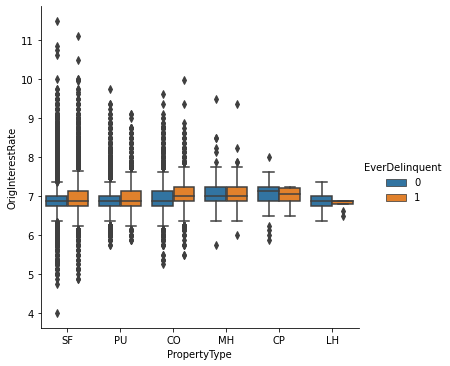

In [46]:
sns.catplot(x='PropertyType', y='OrigInterestRate', hue='EverDelinquent', data=data, kind='box')
plt.show()

## We will do some multivariate analysis to further understand the data.

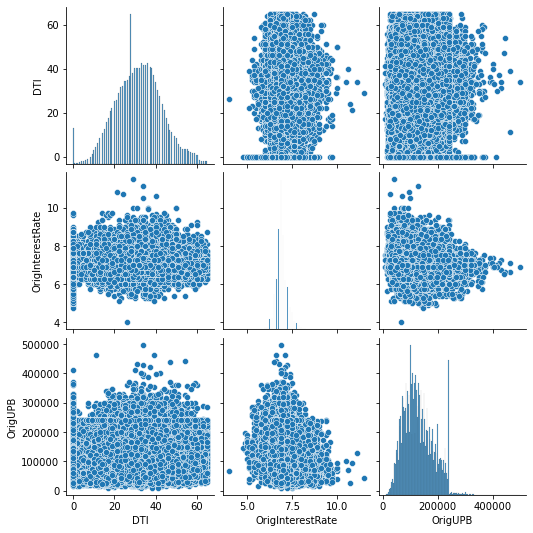

In [47]:
# Perform multivariate analysis
sns.pairplot(data[['DTI', 'OrigInterestRate',  'OrigUPB']])
plt.show()


### Lets check the dependency of the columns with everdelinquent column.

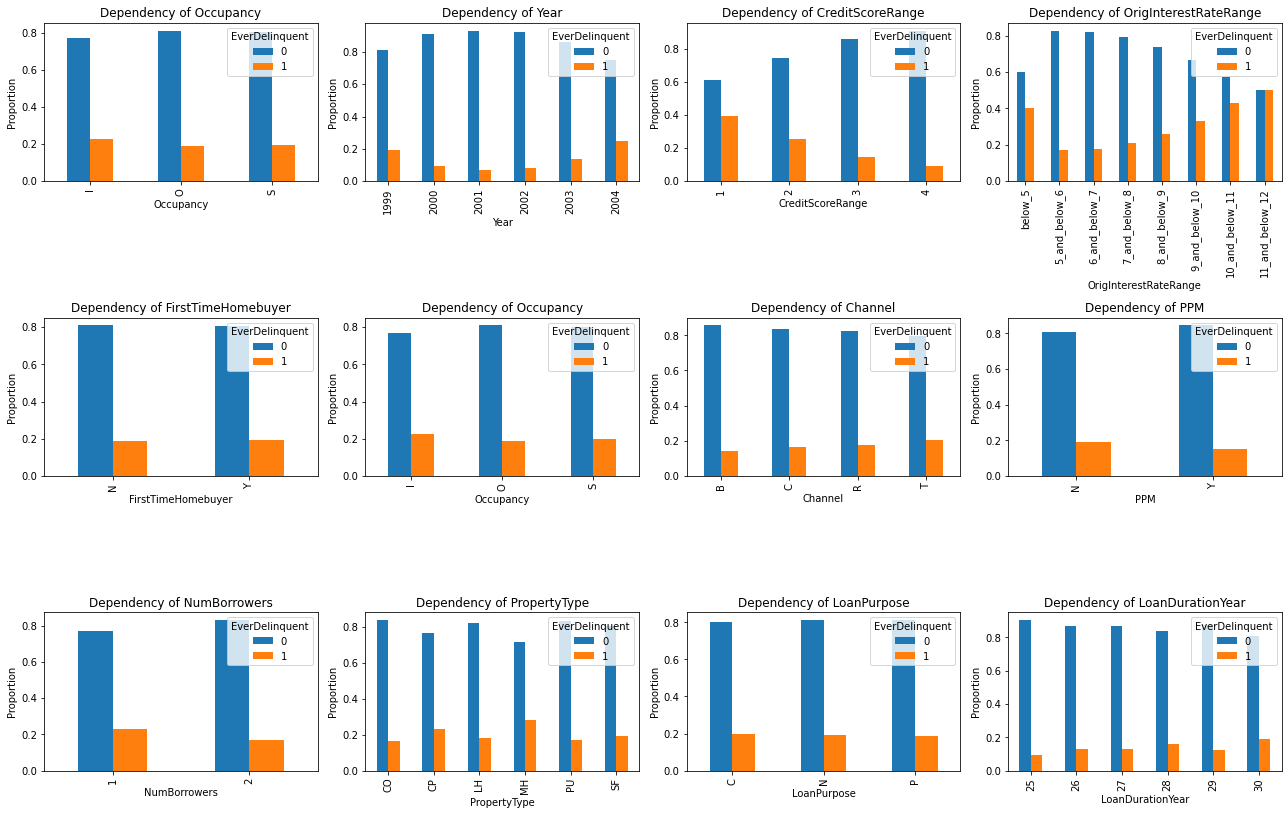

In [48]:
cols=['Occupancy','Year','CreditScoreRange',
    'OrigInterestRateRange',
     'FirstTimeHomebuyer',
    'Occupancy',
    'Channel',
    'PPM','NumBorrowers',
    'PropertyType',
    'LoanPurpose',
    'LoanDurationYear']
num_rows = 4  # Number of rows
num_cols = 4  # Number of columns

fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 15))

# Flatten the axs array to access subplots by index
axs = axs.flatten()

# Iterate over columns and create subplots
for i, x in enumerate(cols):
    df = pd.crosstab(data[x], data['EverDelinquent'])
    df.div(df.sum(1).astype(float), axis=0).plot(kind='bar', ax=axs[i])
    axs[i].set_title('Dependency of ' + x , fontsize=12)
    axs[i].set_xlabel(x)
    axs[i].set_ylabel('Proportion')
    axs[i].legend(title='EverDelinquent')

# Hide any unused subplots
for j in range(len(cols), num_rows * num_cols):
    fig.delaxes(axs[j])

fig.tight_layout()
plt.show()

### We can see that from the plots that occupancy type do not have much impact on delinquency as it is distributed equally. Year has some impact here, in 2004 and 2009 there were more Delinquency. Credit score also have a notable impact here, when the credit score is lesser more delinquency has happened. The The interest  range till 12% shows steady increase in Delinquency  but after that there is no delinquency which is to be noted in particular. As OCLTV increases the delinquency increases and same thing can be seen with DT. MIP value shows a steady increase in delinquency as the value increases may be because of the insurance protection. First time home buyers, occupancy, and loan purpose show not much delinquency changes in its catagories. There is an influence of property type, loan duration year,PPM and number of borrowers in delinquency.

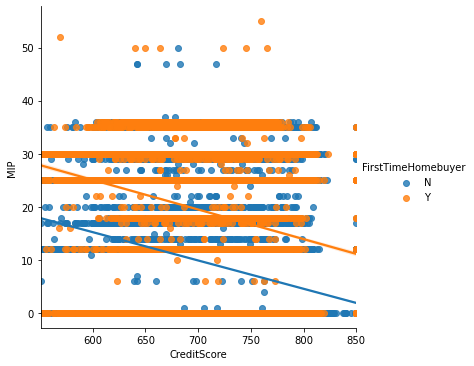

In [49]:

sns.lmplot(x='CreditScore', y='MIP', hue='FirstTimeHomebuyer', data=data)
plt.show()


## The figure shows the correlation matrix of the data.

In [51]:
cormat = data.corr()
round(cormat,2)
cormat.style.background_gradient(cmap='coolwarm') 


,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,Year,CreditScoreRange,LoanDurationYear,LTVRange
CreditScore,1.000000,-0.218184,0.008352,-0.254317,-0.130434,-0.018204,-0.254741,-0.130369,-0.020528,-0.250769,-0.177140,0.013195,0.021976,0.948809,-0.018845,-0.157561
MIP,-0.218184,1.000000,-0.031880,0.719612,0.121157,0.008826,0.720995,0.128485,0.023476,0.067339,0.056271,-0.088086,-0.027514,-0.215227,0.020711,0.208003
Units,0.008352,-0.031880,1.000000,-0.031039,0.003720,0.036994,-0.030948,0.061934,0.001526,0.009171,0.000099,0.023599,-0.000946,0.009670,0.000849,-0.003434
OCLTV,-0.254317,0.719612,-0.031039,1.000000,0.143264,0.112211,0.999398,0.107749,0.029893,0.069835,0.062753,-0.096510,-0.034422,-0.247739,0.027766,0.686475
DTI,-0.130434,0.121157,0.003720,0.143264,1.000000,0.090014,0.143025,0.052111,0.033591,0.047292,0.033571,-0.051742,-0.020507,-0.128964,0.033650,0.083038
OrigUPB,-0.018204,0.008826,0.036994,0.112211,0.090014,1.000000,0.111439,-0.119874,-0.016088,-0.063116,-0.061801,-0.209800,0.028339,-0.011371,-0.014450,0.147821
LTV,-0.254741,0.720995,-0.030948,0.999398,0.143025,0.111439,1.000000,0.108129,0.029817,0.070137,0.062938,-0.096870,-0.034665,-0.248159,0.027690,0.686652
OrigInterestRate,-0.130369,0.128485,0.061934,0.107749,0.052111,-0.119874,0.108129,1.000000,0.030966,0.061014,0.051990,-0.128637,-0.035953,-0.130691,0.025281,0.038466
OrigLoanTerm,-0.020528,0.023476,0.001526,0.029893,0.033591,-0.016088,0.029817,0.030966,1.000000,0.009774,0.005399,0.013366,-0.733557,-0.017837,0.978936,0.015388
EverDelinquent,-0.250769,0.067339,0.009171,0.069835,0.047292,-0.063116,0.070137,0.061014,0.009774,1.000000,0.416898,0.228090,-0.011268,-0.246530,0.008853,0.038600


In [52]:
#Now we'll try to find which features are strongly correlated with CreditScore
cormat = cormat['CreditScore'][:-1]  # -1 because the latest row is SalePrice
golden_features_list = cormat[abs(cormat) > 0.05].sort_values(ascending=False)
print("There are {} strongly correlated values with CreditScore:\n{}".format(len(golden_features_list), golden_features_list))


There are 9 strongly correlated values with CreditScore:
CreditScore         1.000000
CreditScoreRange    0.948809
OrigInterestRate   -0.130369
DTI                -0.130434
MonthsDelinquent   -0.177140
MIP                -0.218184
EverDelinquent     -0.250769
OCLTV              -0.254317
LTV                -0.254741
Name: CreditScore, dtype: float64


## We will find the ratio of OrigUPB and MSA to form a new column called UPBtoMSA. The lesser the value of UPBtoMSA means more security amount is payed by the customer. We will create a band for this also.

In [53]:
data['UPBtoMSA']=(data['OrigUPB'] / data['MSA'].astype(int))
print('min',data['UPBtoMSA'].min())
print('max',data['UPBtoMSA'].max())
print('mean',data['UPBtoMSA'].mean())

min 0.20989001763076148
max 36.038394415357764
mean 4.9794517444842


# Encoding the data

## we will do label encoding and ordinal encoding. Label encoding encodes the categorival columns as category approach. We have some columns with ordinal data , so we use ordinal encoding on them.

In [54]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,Year,CreditScoreRange,FirstPaymentMonth,MaturityMonth,LoanDuration,LoanDurationYear,OrigInterestRateRange,LTVRange,RepaymentRange,UPBtoMSA
0,850,01/1999,N,01/2029,16974,25,1,O,89,27,117000,89,6.750,T,N,IL,SF,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52,1999,4,01,01,10958 days,30,6_and_below_7,3,48-96,6.892895
1,850,01/1999,N,01/2029,19740,0,1,O,73,17,109000,73,6.500,R,N,CO,SF,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144,1999,4,01,01,10958 days,30,6_and_below_7,3,96-144,5.521783
2,850,01/1999,N,01/2029,29940,0,1,O,75,16,88000,75,6.875,T,N,KS,SF,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67,1999,4,01,01,10958 days,30,6_and_below_7,3,48-96,2.939212
3,850,01/1999,N,01/2029,31084,0,1,O,76,14,160000,76,6.875,R,N,CA,SF,N,360,2,GM,GMACMTGECORP,0,0,35,1999,4,01,01,10958 days,30,6_and_below_7,3,0-48,5.147343
4,850,01/1999,N,01/2029,35644,0,1,O,78,18,109000,78,7.125,R,N,NJ,SF,N,360,2,GM,GMACMTGECORP,0,0,54,1999,4,01,01,10958 days,30,7_and_below_8,3,48-96,3.058018


In [55]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode =[
    'FirstTimeHomebuyer',
    'PPM'
    ]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on the specified columns
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])


In [56]:

from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

columns_to_encode = [
    'OrigInterestRateRange',
    'RepaymentRange'
    ]

category_order = [
   
    ['below_5', '5_and_below_6', '6_and_below_7', '7_and_below_8','8_and_below_9','9_and_below_10','10_and_below_11','11_and_below_12','above_12'],
    ['0-48', '48-96', '96-144','144-192','192-240']
]

# Initialize the OrdinalEncoder with specified category order
ordinal_encoder = OrdinalEncoder(categories=category_order)

# Encode the specified columns
data[columns_to_encode] = ordinal_encoder.fit_transform(data[columns_to_encode])

# Print the encoded dataset
data.head()


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,Year,CreditScoreRange,FirstPaymentMonth,MaturityMonth,LoanDuration,LoanDurationYear,OrigInterestRateRange,LTVRange,RepaymentRange,UPBtoMSA
0,850,01/1999,0,01/2029,16974,25,1,O,89,27,117000,89,6.750,T,0,IL,SF,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52,1999,4,01,01,10958 days,30,2.0,3,1.0,6.892895
1,850,01/1999,0,01/2029,19740,0,1,O,73,17,109000,73,6.500,R,0,CO,SF,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144,1999,4,01,01,10958 days,30,2.0,3,2.0,5.521783
2,850,01/1999,0,01/2029,29940,0,1,O,75,16,88000,75,6.875,T,0,KS,SF,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67,1999,4,01,01,10958 days,30,2.0,3,1.0,2.939212
3,850,01/1999,0,01/2029,31084,0,1,O,76,14,160000,76,6.875,R,0,CA,SF,N,360,2,GM,GMACMTGECORP,0,0,35,1999,4,01,01,10958 days,30,2.0,3,0.0,5.147343
4,850,01/1999,0,01/2029,35644,0,1,O,78,18,109000,78,7.125,R,0,NJ,SF,N,360,2,GM,GMACMTGECORP,0,0,54,1999,4,01,01,10958 days,30,3.0,3,1.0,3.058018


# Feature engineering



## Droping unnecessary columns

In [57]:
data.drop(['FirstPaymentDate','MaturityDate','Units','Occupancy','Year','MSA','OrigUPB','Channel','PropertyState','PropertyType','LoanPurpose','SellerName','ServicerName','FirstPaymentMonth','MaturityMonth','LoanDuration','LoanDurationYear','OrigInterestRateRange','UPBtoMSA','MonthsDelinquent'],axis=1, inplace=True)
data.shape

(181248, 15)

In [58]:
data.head()

,CreditScore,FirstTimeHomebuyer,MIP,OCLTV,DTI,LTV,OrigInterestRate,PPM,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsInRepayment,CreditScoreRange,LTVRange,RepaymentRange
0,850,0,25,89,27,89,6.750,0,360,2,0,52,4,3,1.0
1,850,0,0,73,17,73,6.500,0,360,1,0,144,4,3,2.0
2,850,0,0,75,16,75,6.875,0,360,2,0,67,4,3,1.0
3,850,0,0,76,14,76,6.875,0,360,2,0,35,4,3,0.0
4,850,0,0,78,18,78,7.125,0,360,2,0,54,4,3,1.0


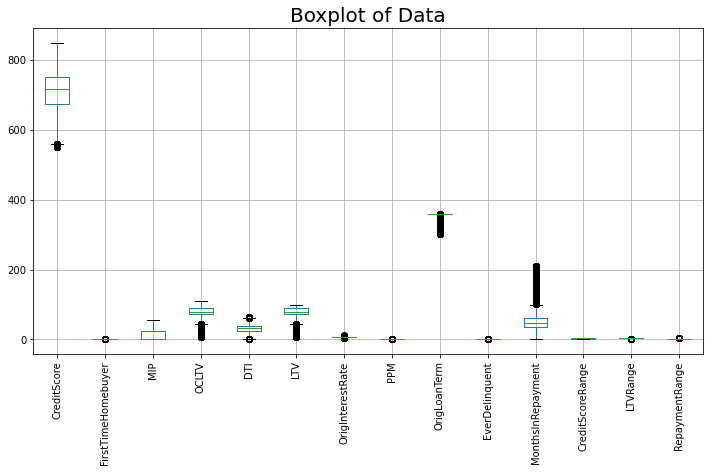

In [59]:
plt.figure(figsize=(12, 6))
data.boxplot()
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
plt.title("Boxplot of Data", fontsize=20)
plt.show()

## We have seen that there were many outliers in the data, we will remove them.

In [60]:
'''
def remove_outliers(data, columns, threshold=1.5):
    df = data.copy()
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
# Example usage
outlier_columns = ['CreditScore', 'LTV']
data = remove_outliers(data, outlier_columns)
'''


"\ndef remove_outliers(data, columns, threshold=1.5):\n    df = data.copy()\n    for column in columns:\n        q1 = df[column].quantile(0.25)\n        q3 = df[column].quantile(0.75)\n        iqr = q3 - q1\n        lower_bound = q1 - threshold * iqr\n        upper_bound = q3 + threshold * iqr\n        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]\n    return df\n# Example usage\noutlier_columns = ['CreditScore', 'LTV']\ndata = remove_outliers(data, outlier_columns)\n"

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181248 entries, 0 to 291450
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         181248 non-null  int64  
 1   FirstTimeHomebuyer  181248 non-null  int32  
 2   MIP                 181248 non-null  int64  
 3   OCLTV               181248 non-null  int64  
 4   DTI                 181248 non-null  int64  
 5   LTV                 181248 non-null  int64  
 6   OrigInterestRate    181248 non-null  float64
 7   PPM                 181248 non-null  int32  
 8   OrigLoanTerm        181248 non-null  int64  
 9   NumBorrowers        181248 non-null  object 
 10  EverDelinquent      181248 non-null  int64  
 11  MonthsInRepayment   181248 non-null  int64  
 12  CreditScoreRange    181248 non-null  int32  
 13  LTVRange            181248 non-null  int32  
 14  RepaymentRange      181248 non-null  float64
dtypes: float64(2), int32(4), int64(8),

## There is a chance of overfitting of the data, so we smote function to balance the data

In [62]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = data.drop("EverDelinquent", axis=1)
y = data["EverDelinquent"]

bestfeatures = SelectKBest(score_func=chi2, k=14)
fit = bestfeatures.fit(x, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
featureScores.sort_values(by='Score', ascending=False)

,Specs,Score
10,MonthsInRepayment,312110.752101
0,CreditScore,41422.627934
2,MIP,13589.055889
13,RepaymentRange,11659.226762
11,CreditScoreRange,3966.108289
5,LTV,2695.271685
3,OCLTV,2674.773182
4,DTI,1653.321540
9,NumBorrowers,139.410894
7,PPM,31.128898


In [63]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
x_smote, y_smote = smt.fit_resample(x, y)


In [64]:
#Now Concat the x_smote and y_smote and make balance dataframe
df_smote_over = pd.concat([pd.DataFrame(x_smote,columns=['CreditScore','FirstTimeHomebuyer','MIP','OCLTV','DTI','LTV','OrigInterestRate','PPM','OrigLoanTerm','NumBorrowers','MonthsInRepayment','CreditScoreRange','LTVRange','RepaymentRange']), pd.DataFrame(y_smote, columns=['EverDelinquent'])], axis=1)

In [65]:


df_smote_over = df_smote_over.astype(int)

#converting EveryColumn into int datatype except "OrigInterestRate"
for x in df_smote_over.columns:
  if(x=="OrigInterestRate"):
    continue
  df_smote_over[x]=df_smote_over[x].astype(int)

In [66]:
df_smote_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284046 entries, 0 to 284045
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   CreditScore         284046 non-null  int32
 1   FirstTimeHomebuyer  284046 non-null  int32
 2   MIP                 284046 non-null  int32
 3   OCLTV               284046 non-null  int32
 4   DTI                 284046 non-null  int32
 5   LTV                 284046 non-null  int32
 6   OrigInterestRate    284046 non-null  int32
 7   PPM                 284046 non-null  int32
 8   OrigLoanTerm        284046 non-null  int32
 9   NumBorrowers        284046 non-null  int32
 10  MonthsInRepayment   284046 non-null  int32
 11  CreditScoreRange    284046 non-null  int32
 12  LTVRange            284046 non-null  int32
 13  RepaymentRange      284046 non-null  int32
 14  EverDelinquent      284046 non-null  int32
dtypes: int32(15)
memory usage: 16.3 MB


## We will scale the data

In [67]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the DataFrame
df = df_smote_over.copy()

# Select the columns to scale
columns_to_scale = df_smote_over.columns.drop('EverDelinquent')

# Initialize the scaler
scaler = StandardScaler()

# Scale the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()



,CreditScore,FirstTimeHomebuyer,MIP,OCLTV,DTI,LTV,OrigInterestRate,PPM,OrigLoanTerm,NumBorrowers,MonthsInRepayment,CreditScoreRange,LTVRange,RepaymentRange,EverDelinquent
0,2.776793,-0.333571,1.031809,0.669761,-0.440800,0.671404,-0.787062,-0.113713,0.060409,0.965216,-0.301058,1.417519,0.246973,0.097737,0
1,2.776793,-0.333571,-0.842557,-0.268027,-1.425393,-0.266793,-0.787062,-0.113713,0.060409,0.965216,-0.003695,1.417519,0.246973,0.097737,0
2,2.776793,-0.333571,-0.842557,-0.201043,-1.604410,-0.199779,-0.787062,-0.113713,0.060409,0.965216,-0.638068,1.417519,0.246973,-0.796590,0
3,2.776793,-0.333571,-0.842557,-0.067073,-1.246376,-0.065751,1.151172,-0.113713,0.060409,0.965216,-0.261409,1.417519,0.246973,0.097737,0
4,2.776793,2.997866,1.406683,1.071670,-0.440800,1.073488,1.151172,-0.113713,0.060409,-1.036038,2.870805,1.417519,0.246973,2.780716,1


In [68]:
df_numeric = df.select_dtypes(include=[np.number])
print(np.mean(df_numeric))
print(np.std(df_numeric))


CreditScore           7.812703e-16
FirstTimeHomebuyer    4.482699e-17
MIP                   5.923566e-17
OCLTV                -2.905749e-16
DTI                  -3.592162e-17
LTV                  -3.728244e-16
OrigInterestRate      1.098661e-16
PPM                   3.322000e-17
OrigLoanTerm         -1.012179e-14
NumBorrowers         -1.408848e-16
MonthsInRepayment     6.644000e-17
CreditScoreRange     -1.953176e-16
LTVRange             -4.304591e-16
RepaymentRange       -7.284385e-17
EverDelinquent        5.000000e-01
dtype: float64
CreditScore           1.0
FirstTimeHomebuyer    1.0
MIP                   1.0
OCLTV                 1.0
DTI                   1.0
LTV                   1.0
OrigInterestRate      1.0
PPM                   1.0
OrigLoanTerm          1.0
NumBorrowers          1.0
MonthsInRepayment     1.0
CreditScoreRange      1.0
LTVRange              1.0
RepaymentRange        1.0
EverDelinquent        0.5
dtype: float64


## We will be splitting the data in to test and train datas. We will find accuracy of components 

In [69]:
x = df.drop("EverDelinquent", axis=1)
y = df["EverDelinquent"]

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=14, svd_solver="full")
x = pd.DataFrame(pca.fit_transform(x), columns=x.columns)
x.head()

,CreditScore,FirstTimeHomebuyer,MIP,OCLTV,DTI,LTV,OrigInterestRate,PPM,OrigLoanTerm,NumBorrowers,MonthsInRepayment,CreditScoreRange,LTVRange,RepaymentRange
0,0.127483,-1.317410,-2.890920,0.740646,0.678692,-0.380038,-0.429481,-0.029876,-0.384663,1.040226,0.143070,-0.974775,-0.263620,-0.000905
1,1.971412,-1.065704,-2.360985,1.279219,0.596094,-0.304423,-0.685615,0.382603,0.181078,-0.217418,-0.179011,-0.970290,-0.057067,-0.002436
2,1.790884,-2.051457,-2.046697,1.348356,0.611487,-0.326676,-0.715636,0.379849,0.491044,-0.219202,-0.240898,-0.970973,0.126954,-0.002529
3,1.541167,-1.409092,-2.103199,0.592388,0.048014,0.356574,-0.974544,1.614323,-0.624998,-0.410373,-0.361289,-0.971611,-0.248527,-0.002981
4,-0.614407,2.359522,-4.982492,-1.352901,-1.935075,1.761886,-0.884501,-0.192118,-0.571093,-0.357740,0.093177,-0.946191,0.067839,-0.001024


# Modeling

In [93]:
# Supporting libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn import metrics 
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn import model_selection



# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

#Improve Models
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score


## Splitting

In [142]:
# Spliting the dataset - 0.2
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Logistic Regression

In [89]:
# Training the Logistic Regression model on the Training set
classifier_LogR = LogisticRegression()
classifier_LogR.fit(X_train, y_train)

# Predicting the Test set results
LR_class_pred = classifier_LogR.predict(X_test)

# Making the Confusion Matrix
LR_cm = confusion_matrix(y_test, LR_class_pred)
score_LogR = accuracy_score(y_test, LR_class_pred)

# Precision of the model
print('The precision of the model is:', (score_LogR)*100)

# Classification Report
print(classification_report(y_test, LR_class_pred))

The precision of the model is: 71.9906494676956
              precision    recall  f1-score   support

           0       0.72      0.73      0.72     35565
           1       0.73      0.71      0.72     35447

    accuracy                           0.72     71012
   macro avg       0.72      0.72      0.72     71012
weighted avg       0.72      0.72      0.72     71012



## Random Forest

In [159]:
# Training the Random Forest Classifier model on the Training set
classifier_RFC = RandomForestClassifier()
classifier_RFC.fit(X_train, y_train)

# Predicting the Test set results
RFC_pred = classifier_RFC.predict(X_test)

# Making the Confusion Matrix
RFC_cm = confusion_matrix(y_test, RFC_pred)
score_RFC = accuracy_score(y_test, RFC_pred)

# Precision of the model
print('The precision of the model is:',(score_RFC)*100)

# Classification Report
print(classification_report(y_test, RFC_pred))

The precision of the model is: 82.14222848090125
              precision    recall  f1-score   support

           0       0.84      0.80      0.82     28486
           1       0.81      0.84      0.82     28324

    accuracy                           0.82     56810
   macro avg       0.82      0.82      0.82     56810
weighted avg       0.82      0.82      0.82     56810



## XGBoost

In [157]:
# Training the XGBoost Classifier model on the Training set
classifier_XGB = xgb.XGBClassifier()
classifier_XGB.fit(X_train, y_train)

# Predicting the Test set results
XGB_pred = classifier_XGB.predict(X_test)

# Making the Confusion Matrix
XGB_cm = confusion_matrix(y_test, XGB_pred)
score_XGB = accuracy_score(y_test, XGB_pred)

# Precision of the model
print('The precision of the model is:', (score_XGB) * 100)

# Classification Report
print(classification_report(y_test, XGB_pred))

The precision of the model is: 74.05034324942793
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     28486
           1       0.74      0.74      0.74     28324

    accuracy                           0.74     56810
   macro avg       0.74      0.74      0.74     56810
weighted avg       0.74      0.74      0.74     56810



## KNN

In [87]:
# Training the KNN model on the Training set
classifier_KNC = KNeighborsClassifier()
classifier_KNC.fit(X_train, y_train)

# Predicting the Test set results
KNN_pred = classifier_KNC.predict(X_test)

# Making the Confusion Matrix
KNN_cm = confusion_matrix(y_test, KNN_pred)
score_KNC = precision_score(y_test, KNN_pred, average='macro')

# Precision of the model
print('The precision of the model is:',(score_KNC)*100)

# Classification Report
print(classification_report(y_test, KNN_pred))

The precision of the model is: 76.69749024345553
              precision    recall  f1-score   support

           0       0.80      0.71      0.75     35565
           1       0.74      0.82      0.78     35447

    accuracy                           0.76     71012
   macro avg       0.77      0.76      0.76     71012
weighted avg       0.77      0.76      0.76     71012



# Improving Classification Models Performance

## GridSearchCV (Logistic Regression)

In [94]:
# doing the gridSearch
LogR_params = [{'penalty' : ['l1','l2'], # Also known as regularization. It specifies the norm of the penalty. 
                'C'       : [10.0, 25.0, 50.0], # it shows the Inverse of regularization strength. 
                'solver'  : ['newton-cg', 'lbfgs', 'liblinear'] # this selects the algorithm to use in the optimization problem.
               }]

clf_LogR = GridSearchCV(classifier_LogR, LogR_params, cv = 3, scoring='accuracy')

clf_LogR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [10.0, 25.0, 50.0], 'penalty': ['l1', 'l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear']}],
             scoring='accuracy')

In [95]:
# showing the best parameters
print(clf_LogR.best_params_)

{'C': 50.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [96]:
# showing the best score
print(clf_LogR.best_score_*100)

71.99414282877484


In [99]:
# Classification Report  - Grid Search
grid_predictions = clf_LogR.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72     35565
           1       0.73      0.71      0.72     35447

    accuracy                           0.72     71012
   macro avg       0.72      0.72      0.72     71012
weighted avg       0.72      0.72      0.72     71012



## GridSearchCV (Random Forest Classifier)

In [145]:
# doing the gridSearch
RFC_params = [{'max_depth': [9, 53, 101], # this is the longest path between the root node and the leaf node. It is possible to limit the depth of every tree in the random forest is goint to grow
                'max_features': [1, 3], # It shows the number of features to consider when the model is looking for the best split.
                'n_estimators': [100, 300], # it defines the number of trees in the forest.
               'criterion' :['gini', 'entropy'] # Checks the quality of the split.
               
              }]

clf_RFC = GridSearchCV(classifier_RFC, RFC_params, cv = 2, scoring='accuracy')

clf_RFC.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [101], 'max_features': [1, 3]}],
             scoring='accuracy')

In [146]:
# showing the best parameters
print(clf_RFC.best_params_)

{'max_depth': 101, 'max_features': 3}


In [147]:
# showing the best score
print(clf_RFC.best_score_*100)

78.52672991955501


In [139]:
# Classification Report  - Grid Search
grid_predictions = clf_RFC.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81     35565
           1       0.81      0.84      0.82     35447

    accuracy                           0.82     71012
   macro avg       0.82      0.82      0.82     71012
weighted avg       0.82      0.82      0.82     71012



## GridSearchCV (XGBoost)

In [104]:
# Defining the parameter grid for GridSearchCV
XGB_params = [{'max_depth': [3, 6, 9],
               'learning_rate': [0.1, 0.01, 0.001],
               'n_estimators': [50, 150],
               'reg_alpha': [0, 0.1, 0.5]
              }]

# Performing GridSearchCV
clf_XGB = GridSearchCV(classifier_XGB, XGB_params, cv=2, scoring='accuracy')
clf_XGB.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012...
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constr

In [105]:
# Showing the best parameters
print(clf_XGB.best_params_)

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 150, 'reg_alpha': 0.5}


In [106]:
# Showing the best score
print(clf_XGB.best_score_ * 100)

74.69840494944468


In [107]:
# Classification Report - Grid Search
grid_predictions = clf_XGB.predict(X_test)

# Print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75     35565
           1       0.75      0.75      0.75     35447

    accuracy                           0.75     71012
   macro avg       0.75      0.75      0.75     71012
weighted avg       0.75      0.75      0.75     71012



## GridSearchCV (KNeighbors Classifier)

In [152]:
# doing the gridSearch
KNC_params = [{'n_neighbors' : [3, 5], # This is the number of neighbors. For this project just odd numbers
                'weights' : ['uniform', 'distance'], # This is used to test the contribution of members of the neighborhood via different weightings.
                'metric' : ['minkowski', 'chebyshev'], # This is used to choose the composition of the neighborhood.
                'leaf_size' : [7, 21], # This value can affect the memory needed to store the tree. 
                'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], # This is the algorithm used to compute the nearest neighbors. 
                'p' : [1, 2] # This is the Power parameter for the Minkowski metric.                        
              }]

clf_KNC = GridSearchCV(classifier_KNC, KNC_params, cv = 2, scoring='accuracy')

clf_KNC.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid=[{'leaf_size': [7, 21], 'n_neighbors': [3, 5]}],
             scoring='accuracy')

In [153]:
# showing the best parameters
print(clf_KNC.best_params_)

{'leaf_size': 7, 'n_neighbors': 3}


In [154]:
# showing the best score
print(clf_KNC.best_score_*100)

74.23471633015895


In [126]:
# Classification Report  - Grid Search
grid_predictions = clf_KNC.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76     35565
           1       0.74      0.83      0.79     35447

    accuracy                           0.77     71012
   macro avg       0.78      0.77      0.77     71012
weighted avg       0.78      0.77      0.77     71012



## Summarising Performance

In [158]:
# using print to show all the scores

print("Accuracy of the Logistic Regression - base model:           ", score_LogR*100)
print("Accuracy of the Logistic Regression - GridSearchCV:         ", clf_LogR.best_score_*100)

print("Accuracy of the Random Forest Classifier - base model:      ", score_RFC*100)
print("Accuracy of the Random Forest Classifier - GridSearchCV:    ", clf_RFC.best_score_*100)

print("Accuracy of the XGBoost Classifier - base model:            ", score_XGB*100)
print("Accuracy of the XGBoost Classifier - GridSearchCV :         ", clf_XGB.best_score_*100)

print("Accuracy of the KNeighbors Classifier - base model:         ", score_KNC*100)
print("Accuracy of the KNeighbors Classifier - GridSearchCV:       ", clf_KNC.best_score_*100)

Accuracy of the Logistic Regression - base model:            71.9906494676956
Accuracy of the Logistic Regression - GridSearchCV:          71.99414282877484
Accuracy of the Random Forest Classifier - base model:       82.11406442527725
Accuracy of the Random Forest Classifier - GridSearchCV:     78.52672991955501
Accuracy of the XGBoost Classifier - base model:             74.05034324942793
Accuracy of the XGBoost Classifier - GridSearchCV :          74.69840494944468
Accuracy of the KNeighbors Classifier - base model:          76.69749024345553
Accuracy of the KNeighbors Classifier - GridSearchCV:        74.23471633015895
